## Data Science Model that predicts the price of a house based on its features

### 1. Problem definition

Can we find a model that explains how these factors affect the use housing prices

### 2. Data

The data was originally collected from https://fred.stlouisfed.org/series/CSUSHPISA%5D
The macroeconomic factors were collected from https://www.kaggle.com/datasets/faryarmemon/usa-housing-market-factors

### 3. Evaluation

### 4. Features
*the data dictionary*

Independent Variables
1. Date
2. Population
3. House supply
4. GDP
5. Morgage rate
6. employment rate
7. permit new
8. ppi res
9. m3
10. cci
11. delinquency rate
12. hcai

Dependent Vairables
1. House_price_index

In [71]:
# importing the EDA and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Models for feature scaling
from sklearn.preprocessing import StandardScaler

# Models for evaluation
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score


### Load Data

In [5]:
df = pd.read_csv("Housing_Macroeconomic_Factors_US (2).csv")
df.head(5)

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN


In [24]:
df.shape

(425, 13)

In [25]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               425 non-null    datetime64[ns]
 1   house_price_index  425 non-null    float64       
 2   population         425 non-null    int64         
 3   house_supply       425 non-null    float64       
 4   gdp                422 non-null    float64       
 5   mortgage_rate      422 non-null    float64       
 6   employment_rate    422 non-null    float64       
 7   permit_new         422 non-null    float64       
 8   ppi_res            422 non-null    float64       
 9   m3                 422 non-null    float64       
 10  cci                422 non-null    float64       
 11  delinquency_rate   374 non-null    float64       
 12  hcai               285 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 43.3 KB

In [26]:
df.isnull().sum()

Date                   0
house_price_index      0
population             0
house_supply           0
gdp                    3
mortgage_rate          3
employment_rate        3
permit_new             3
ppi_res                3
m3                     3
cci                    3
delinquency_rate      51
hcai                 140
dtype: int64

Since gdp, mortgage rate, employment_rate, permit_new, ppi_res, m3, cci each have 3 missing values we will drop the missing values

In [27]:
# Check if the columns exist in the dataframe
columns_to_drop = ['gdp', 'mortgage_rate', 'employment_rate', 'permit_new', 'ppi_res', 'm3', 'cci']
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop rows with missing values in the existing columns
df = df.dropna(subset=existing_columns)

In [28]:
df.isna().sum()

Date                   0
house_price_index      0
population             0
house_supply           0
gdp                    0
mortgage_rate          0
employment_rate        0
permit_new             0
ppi_res                0
m3                     0
cci                    0
delinquency_rate      48
hcai                 137
dtype: int64

Dropping the rows deliquency rate and hcai would lead to loss of important data, we can either drop the columns or replace the missing values with the mean

In [29]:
# replacing missing values with the mean
df['delinquency_rate'] = df['delinquency_rate'].fillna(df['delinquency_rate'].mean())
df['hcai'] = df['hcai'].fillna(df['hcai'].mean())


In [30]:
df.isna().sum()

Date                 0
house_price_index    0
population           0
house_supply         0
gdp                  0
mortgage_rate        0
employment_rate      0
permit_new           0
ppi_res              0
m3                   0
cci                  0
delinquency_rate     0
hcai                 0
dtype: int64

In [31]:
df.describe()

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
count,422,422.000000,422.00000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,2004-07-16 12:40:56.872037888,134.713419,291697.63981,5.797867,99.955457,6.328301,70.759327,1346.962085,166.813685,7.666456,100.124667,3.984947,8.981895
min,1987-01-01 00:00:00,63.965000,241857.00000,3.300000,91.543057,2.684000,60.261014,513.000000,100.000000,2.743900,96.460330,1.400000,2.293000
25%,1995-10-08 18:00:00,81.517250,267646.00000,4.400000,99.559318,4.266250,69.317138,1077.250000,133.500000,3.615025,99.106098,2.160000,3.208000
50%,2004-07-16 12:00:00,139.230500,293476.50000,5.450000,99.977924,6.257250,71.221613,1362.000000,154.750000,6.297450,100.498000,2.840000,8.981895
75%,2013-04-23 12:00:00,174.215750,316680.50000,6.700000,100.556927,7.912000,72.281388,1614.750000,207.400000,10.617625,101.063150,3.984947,10.491000
max,2022-02-01 00:00:00,290.371000,332750.00000,12.200000,101.825852,11.260000,74.507436,2263.000000,303.546000,21.749700,102.977600,11.360000,21.774000
std,NaN,52.027280,28081.13867,1.685884,1.124453,2.209432,2.247253,394.776877,43.943882,4.656247,1.466327,2.741686,5.630835


### Performing EDA with the date column
`parse-date` parameter should be passed will loading the data

In [22]:
df = pd.read_csv("Housing_Macroeconomic_Factors_US (2).csv",
                 parse_dates=['Date'])

In [33]:
df.Date.dtype

dtype('<M8[ns]')

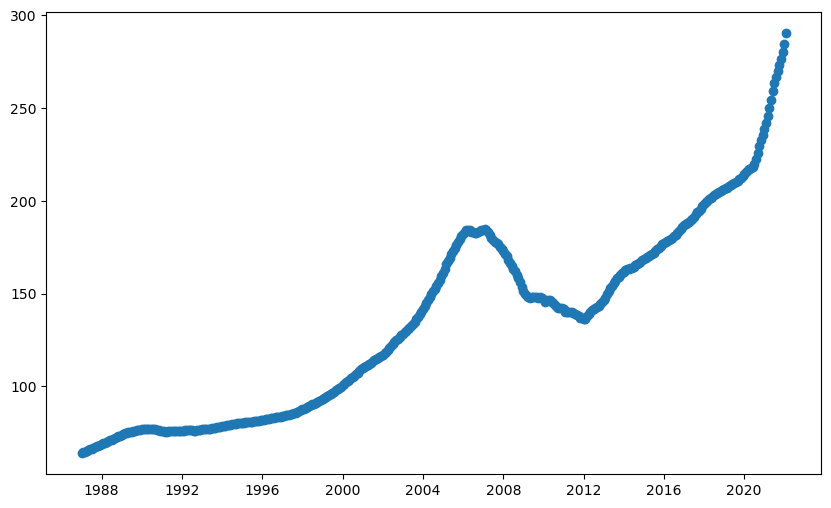

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Date'], df['house_price_index'])

In [38]:
df.head(5)

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,3.984947,8.981895
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,3.984947,8.981895
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,3.984947,8.981895
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,3.984947,8.981895
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,3.984947,8.981895


#### EDA on the house price index and population


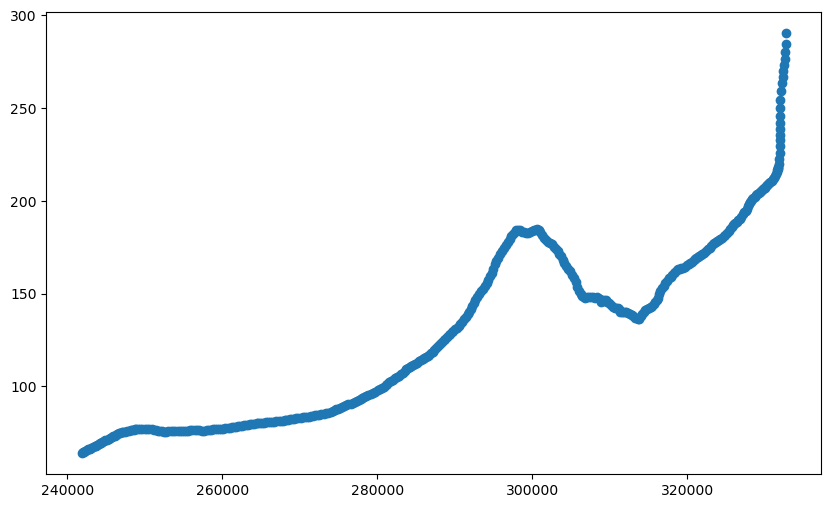

In [53]:
# plotting house price index vs population
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['population'], df['house_price_index'])

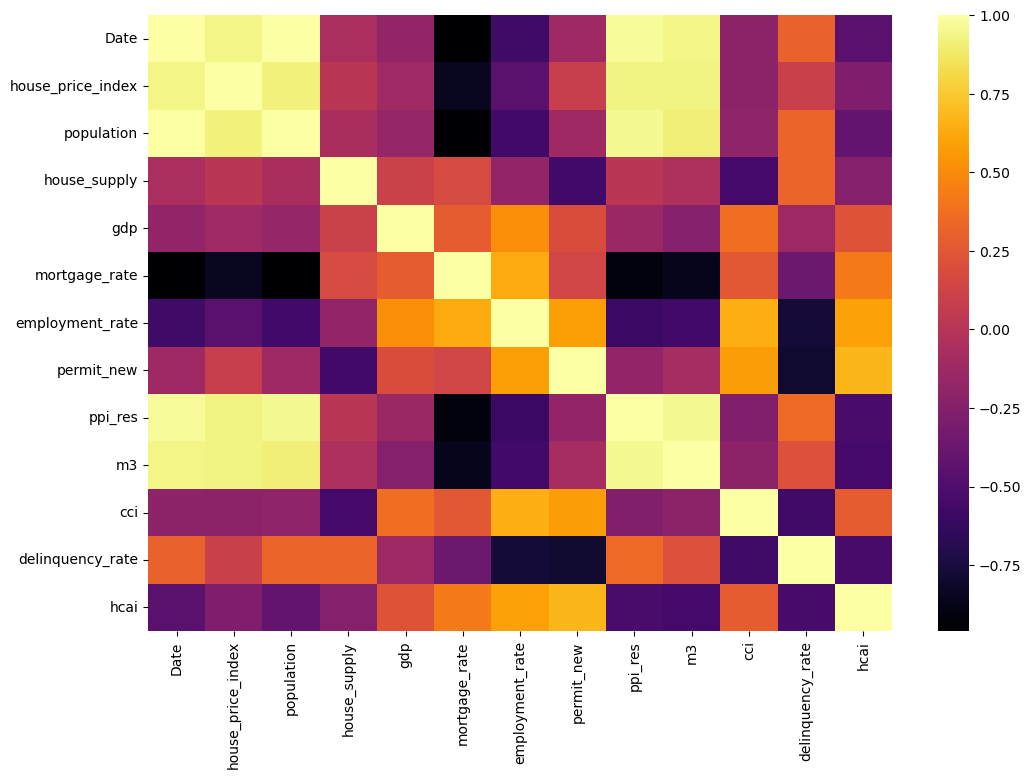

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='inferno');

#### Training our multiple regression model

In [47]:
# splitting the data into features and target variable

# random seep
np.random.seed(42)

# split data into X and y
X = df.drop('house_price_index', axis=1)
y = df['house_price_index']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Feature scaling

In [54]:
# before standardization
X_train.describe()

,Date,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
count,337,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,2004-09-27 15:14:25.281899136,292386.540059,5.777745,99.983054,6.291767,70.780208,1352.931751,167.106131,7.629928,100.157951,3.987072,9.114007
min,1987-02-01 00:00:00,242005.000000,3.300000,91.543057,2.684000,60.261014,521.000000,100.400000,2.747500,96.460330,1.400000,2.293000
25%,1996-08-01 00:00:00,270130.000000,4.400000,99.580627,4.270000,69.287420,1072.000000,135.700000,3.744000,99.061660,2.150000,3.208000
50%,2004-11-01 00:00:00,294337.000000,5.400000,100.011006,6.217500,71.265238,1377.000000,156.300000,6.399800,100.528400,2.840000,8.981895
75%,2013-03-01 00:00:00,316357.000000,6.700000,100.607988,7.852000,72.332203,1610.000000,207.500000,10.550000,101.098700,4.150000,12.708000
max,2022-02-01 00:00:00,332750.000000,12.200000,101.825852,11.050000,74.507436,2263.000000,303.546000,21.749700,102.977600,11.360000,21.774000
std,NaN,27372.523872,1.721540,1.184752,2.161765,2.306974,396.476608,42.463312,4.453105,1.479055,2.766047,5.771374


standardization of the features will be done on the training data to prevent leakage

In [56]:
# standardization of the features using StandardScaler

# convert 'Date' column to numeric representation
X_train['Date'] = X_train['Date'].astype(np.int64)
X_test['Date'] = X_test['Date'].astype(np.int64)

# create an instance of standard scaler
scaler = StandardScaler()

# standardize the training dataset
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                   index=X_train.index,
                                   columns=X_train.columns)

# standardize the testing data
X_test_transformed = pd.DataFrame(scaler.transform(X_test),
                                  index=X_test.index,
                                  columns=X_test.columns)

# after standardization
X_train_transformed.describe()

,Date,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
count,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02,3.370000e+02
mean,-8.960851e-17,3.557985e-16,-2.582833e-16,-2.046764e-14,3.057231e-16,2.817397e-15,-4.216871e-17,6.588861e-17,-1.410016e-16,-1.635092e-14,-2.820032e-16,1.304594e-16
std,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00,1.001487e+00
min,-1.786628e+00,-1.843325e+00,-1.441401e+00,-7.134445e+00,-1.671380e+00,-4.566516e+00,-2.101432e+00,-1.573248e+00,-1.098040e+00,-2.503706e+00,-9.366862e-01,-1.183626e+00
25%,-8.255233e-01,-8.143069e-01,-8.014880e-01,-3.401770e-01,-9.366297e-01,-6.480383e-01,-7.096244e-01,-7.407060e-01,-8.739311e-01,-7.423128e-01,-6.651380e-01,-1.024849e+00
50%,9.520997e-03,7.136208e-02,-2.197489e-01,2.362803e-02,-3.440591e-02,2.105576e-01,6.079561e-02,-2.548600e-01,-2.766513e-01,2.508356e-01,-4.153137e-01,-2.292494e-02
75%,8.523228e-01,8.770146e-01,5.365119e-01,5.282658e-01,7.228135e-01,6.737407e-01,6.493460e-01,9.526797e-01,6.567135e-01,6.369930e-01,5.899056e-02,6.236534e-01
max,1.755246e+00,1.476790e+00,3.736077e+00,1.557743e+00,2.204360e+00,1.618037e+00,2.298803e+00,3.217901e+00,3.175485e+00,1.909220e+00,2.669474e+00,2.196846e+00


testing on these 3 models, the models were chosen using this map ~ https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
1. linear regressor
2. Lasso
3. Ridge

In [59]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

# create a function to fit and evaluate the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the machine learning models
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # set random seed
    np.random.seed(42)
    # create an empty dictionary to store the model scores
    model_scores = {}
    # loop through the models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train_transformed, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test_transformed, y_test)
    return model_scores

In [60]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_transformed,
                             X_test=X_test_transformed,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.9931370142293826,
 'Lasso': 0.9905664380957212,
 'Ridge': 0.9925714172380516}

Since `linear regression` has the highest score, we'll perform predictions and evaluation with it

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [65]:
y_preds = lin_reg.predict(X_test_transformed)
y_preds

array([ 97.59384791, 165.35212435, 116.29467191, 193.39983678,
       282.50068661,  74.40263375,  81.74331148,  81.93063084,
        66.93380916,  75.4100854 ,  75.79227457,  85.79152697,
       187.45408736,  88.53319807, 165.79086827, 261.27006506,
        65.48111502, 170.77735685, 132.48501061, 183.53518287,
       129.95874011, 174.48953051, 177.67066129, 180.46386002,
        70.70793899, 179.95193247,  74.63147789, 146.52085805,
       134.58664302,  79.41498125, 250.58095188,  81.47422493,
       151.77907772, 131.43960062, 183.84190205, 119.50771978,
       161.80045121,  79.87504129, 112.20165892, 158.11983304,
        71.90406248,  75.04949672, 285.03533402,  73.43998171,
        88.07967924, 201.61373542,  98.04399681, 146.52865381,
       191.73691804,  64.98730869,  76.83915815, 145.09158416,
        64.19297554,  67.21136528, 189.73187805, 138.04310343,
       150.56839839, 142.94412405,  74.80422773,  78.45358795,
       181.6764572 ,  87.6727892 ,  74.08653001, 207.91

#### Building our evaluation function


In [66]:
def rmsle(y_test, y_preds):
    """
    Calculates the root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# a function to evaluate the model on different levels
def show_scores(model):
    train_preds = model.predict(X_train_transformed)
    test_preds = model.predict(X_test_transformed)
    scores = {
        'Training MAE': mean_absolute_error(y_train, train_preds),
        'Test MAE': mean_absolute_error(y_test, test_preds),
        'Training RMSLE': rmsle(y_train, train_preds),
        'Test RMSLE': rmsle(y_test, test_preds),
        'Training R^2': r2_score(y_train, train_preds),
        'Test R^2': r2_score(y_test, test_preds)
    }
    return scores

#### Testing the model on a subset

In [67]:
model = LinearRegression()

In [69]:
%%time
model.fit(X_train_transformed, y_train)

CPU times: total: 0 ns
Wall time: 2.47 ms


LinearRegression()

In [72]:
show_scores(model)

{'Training MAE': 3.663063536510488,
 'Test MAE': 3.8587132061022635,
 'Training RMSLE': 0.04266333791282436,
 'Test RMSLE': 0.04318644970579918,
 'Training R^2': 0.9905695164015912,
 'Test R^2': 0.9931370142293826}

the `R2 score` has 0.99 score, meaning we can use this model to perform multiple linear regression

#### Hyperparameter tuning with RandomizedSearchCV